<img src='https://torranceca.files.wordpress.com/2019/10/netflix.jpg' alt="Alt Text" height="200">


# Netflix Movies and TV Shows Data Analysis

### Imported necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

### Read dataset in csv file

In [2]:
#import dataset
df = pd.read_csv('C:\\Users\\rm217\\OneDrive\\Desktop\\Data Analyst Projects\\Netflix-Data-Analysis-Python-Project\\netflix_titles.csv')

#To display the basic information
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#To check the number of rows and columns
df.shape

(8807, 12)

In [4]:
#To display the all the columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#To display the datatypes of each columns
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#To display the basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Processing

### Identify and handle the missing values

In [7]:
#Count missing values in each columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Replace the null values as Not Specified in director, cast and country columns

In [8]:
df.fillna({'director': 'Not Specified', 'cast': 'Not Specified', 'country': 'Not Specified'}, inplace = True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

*As we have just few null values in date_added, rating and duration columns so let's delete the null values instead of replacing*

In [9]:
df.dropna(inplace = True)

#### Identify the duplicate records and remove duplicate records if any exist 

In [10]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*We have no duplicate records in the dataset*

## Exploratory Data Analysis

### Question:-1. List all the content released in a year 2010

In [11]:
content_release2010 = df[df['release_year'] == 2010]

content_release2010.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
60,s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,"September 15, 2021",2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."


### Question:-2. List only the movies that were released in a year 2010

In [12]:
df[(df['type'] == 'Movie') & (df['release_year'] == 2010)].head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
60,s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,"September 15, 2021",2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."


### Question:-3. List all the movies/shows, Tom Cruise was cast ?.

In [13]:
df[df['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


### Question:-4. List all the movies directed by director Christopher Nolan.

In [14]:
df[df['director'] == 'Christopher Nolan']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...


### Question:-5. How many Movies got the 'TV-14' rating, in India ?

In [15]:
df[(df['type'] == 'Movie') & (df['rating'] == 'TV-14') & (df['country'] == 'India')].shape

(526, 12)

## Visulization

### Question:-6. What is the distribution of content types (Movies vs. TV Shows) on Netflix?

In [16]:
# Extract the "type" column
content_type = df['type']

# Count the occurrences of each content type
count_content_type = content_type.value_counts()
count_content_type

Movie      6126
TV Show    2664
Name: type, dtype: int64

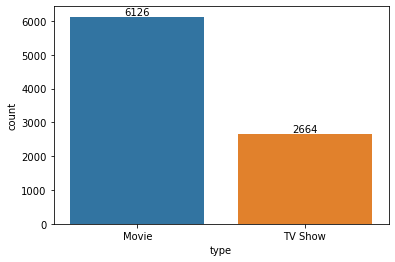

In [17]:
# To Visualize the number of movies and TV shows available on Netflix 
ax = sns.countplot(x = 'type', data = df)

#To add data lables in bar chart
for content in ax.containers:
    ax.bar_label(content)

### Question:-7. Which countries produce the most content available on Netflix?

In [18]:
top_countries = df['country'].value_counts().head(10)
top_countries

United States     2809
India              972
Not Specified      829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

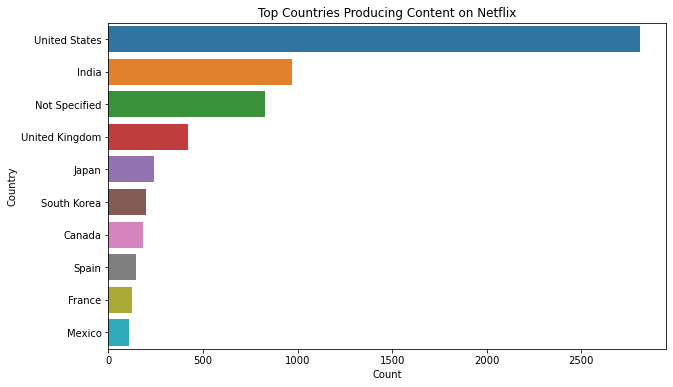

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='country', order =df['country'].value_counts().index[0:10])
plt.title('Top Countries Producing Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Question:-8. What are the most common content ratings on Netflix?

In [20]:
top_ratings = df['rating'].value_counts()

In [21]:
top_ratings

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

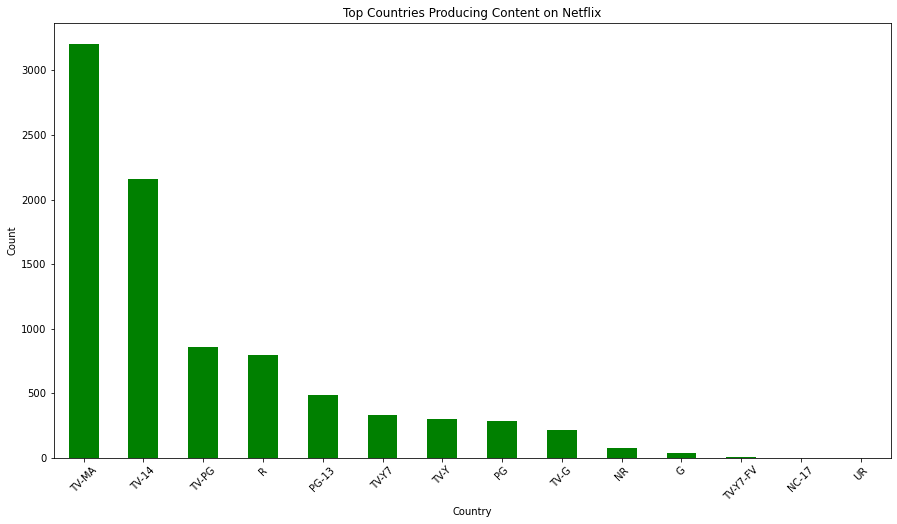

In [22]:
plt.figure(figsize=(15, 8))
top_ratings.plot(kind='bar', color='green')
plt.title('Top Countries Producing Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

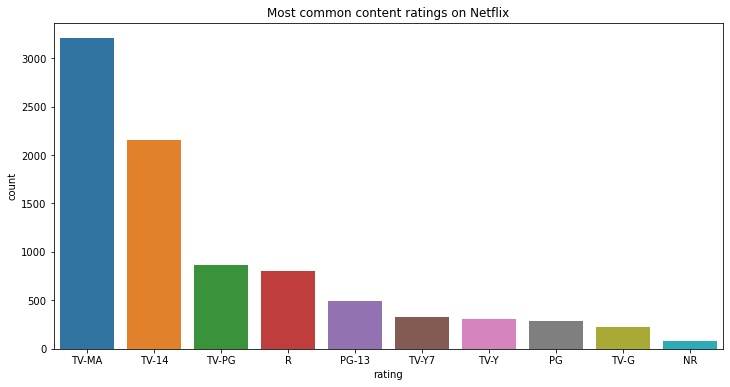

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'rating', order = df['rating'].value_counts().index[0:10], data = df)
plt.title('Most common content ratings on Netflix')
plt.show()

*From the above graph we can see that Netflix has produced majority of the contents for Mature Audience*

### Question:-9. Which directors have the most titles on Netflix?

In [24]:
top_directors = df['director'].value_counts().head(10)
top_directors

#df.director.value_counts().head(10)       (This is the alternate way to find top_directors)

Not Specified             2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: director, dtype: int64

### Question:-10. What are the top 20 years with the highest number of content releases (movies and TV shows combined) on Netflix?

In [25]:
# Most of the Movies and TV shows released in 20 years
top_20_years = df['release_year'].value_counts().head(20)
top_20_years

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
2007      88
2005      80
2004      64
2003      59
2002      51
Name: release_year, dtype: int64

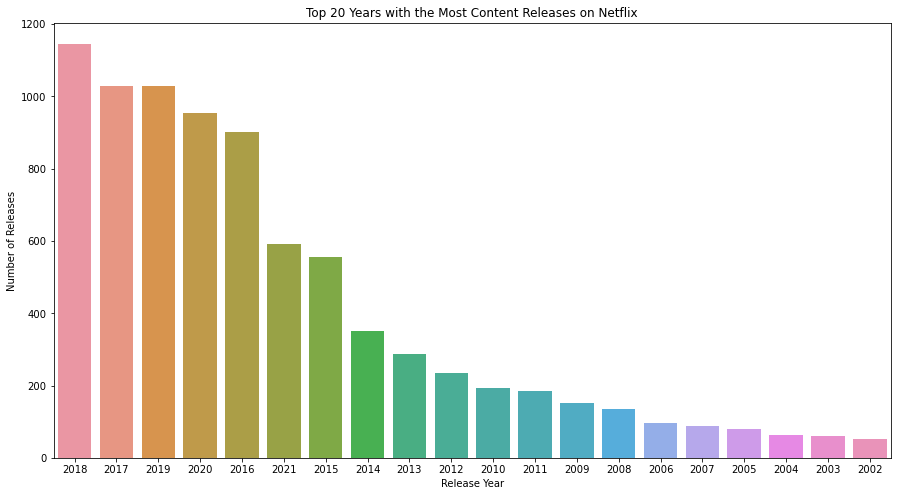

In [26]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'release_year', order = df['release_year'].value_counts().index[0:20], data = df)
plt.title('Top 20 Years with the Most Content Releases on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()

## Conclusion


* *Netflix produces content in multiple countries, with the United States being a significant contributor. It's essential to recognize the platform's global reach in terms of content production.
* *The majority of content on Netflix falls under the TV-MA rating, indicating a focus on mature audiences. However, the platform also offers content suitable for a wide range of age groups.
* *Content on Netflix has been released over several decades, with the most recent content releases dominating the platform.


* Overall, Netflix offers a wide range of content and It is evdent from the EDA on netflix dataset the the growth of the netflix over the past year is increasing as we move forward